# Classification model

###### Nikitha

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [69]:
df=pd.read_csv("game_goalie_stats.csv")

In [70]:
# Check for missing values
print(df.isnull().sum())

game_id                          0
player_id                        0
team_id                          0
timeOnIce                        0
assists                          0
goals                            0
pim                              0
shots                            0
saves                            0
powerPlaySaves                   0
shortHandedSaves                 0
evenSaves                        0
shortHandedShotsAgainst          0
evenShotsAgainst                 0
powerPlayShotsAgainst            0
decision                      4102
savePercentage                 139
powerPlaySavePercentage       4743
evenStrengthSavePercentage     197
dtype: int64


In [71]:
# Drop rows with missing values
df = df.dropna()

In [72]:
print(df.isnull().sum())

game_id                       0
player_id                     0
team_id                       0
timeOnIce                     0
assists                       0
goals                         0
pim                           0
shots                         0
saves                         0
powerPlaySaves                0
shortHandedSaves              0
evenSaves                     0
shortHandedShotsAgainst       0
evenShotsAgainst              0
powerPlayShotsAgainst         0
decision                      0
savePercentage                0
powerPlaySavePercentage       0
evenStrengthSavePercentage    0
dtype: int64


In [73]:
print(df.dtypes)

game_id                         int64
player_id                       int64
team_id                         int64
timeOnIce                       int64
assists                         int64
goals                           int64
pim                             int64
shots                           int64
saves                           int64
powerPlaySaves                  int64
shortHandedSaves                int64
evenSaves                       int64
shortHandedShotsAgainst         int64
evenShotsAgainst                int64
powerPlayShotsAgainst           int64
decision                       object
savePercentage                float64
powerPlaySavePercentage       float64
evenStrengthSavePercentage    float64
dtype: object


In [74]:
df.describe()

,game_id,player_id,team_id,timeOnIce,assists,goals,pim,shots,saves,powerPlaySaves,shortHandedSaves,evenSaves,shortHandedShotsAgainst,evenShotsAgainst,powerPlayShotsAgainst,savePercentage,powerPlaySavePercentage,evenStrengthSavePercentage
count,4.928400e+04,4.928400e+04,49284.000000,49284.000000,49284.000000,49284.000000,49284.000000,49284.000000,49284.000000,49284.000000,49284.000000,49284.000000,49284.000000,49284.000000,49284.000000,49284.000000,49284.000000,49284.000000
mean,2.010659e+09,8.468025e+06,16.850499,3539.682514,0.022360,0.000183,0.090800,29.332907,26.761992,4.546729,0.826577,21.388118,0.902605,23.207532,5.222040,90.659817,84.651259,91.614120
std,6.079323e+06,7.471332e+03,11.076745,431.651544,0.149627,0.013512,0.587195,7.375624,7.375287,3.094339,1.070196,6.682048,1.129039,6.772422,3.275849,6.275837,22.005313,6.762308
min,2.000020e+09,8.445275e+06,1.000000,196.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000,1.000000,20.000000,0.000000,0.000000
25%,2.006020e+09,8.462052e+06,8.000000,3550.000000,0.000000,0.000000,0.000000,24.000000,22.000000,2.000000,0.000000,17.000000,0.000000,19.000000,3.000000,87.500000,75.000000,88.235294
50%,2.011021e+09,8.470147e+06,16.000000,3600.000000,0.000000,0.000000,0.000000,29.000000,27.000000,4.000000,1.000000,21.000000,1.000000,23.000000,5.000000,91.666667,92.857143,92.592593
75%,2.016021e+09,8.473575e+06,24.000000,3600.000000,0.000000,0.000000,0.000000,34.000000,31.000000,6.000000,1.000000,26.000000,1.000000,28.000000,7.000000,95.000000,100.000000,96.000000
max,2.019030e+09,8.480925e+06,54.000000,9027.000000,2.000000,1.000000,27.000000,88.000000,85.000000,25.000000,15.000000,76.000000,15.000000,79.000000,28.000000,100.000000,100.000000,100.000000


In [75]:
df.shape

(49284, 19)

In [76]:
#Handle categorical variables
le = LabelEncoder()
df["decision"] = le.fit_transform(df["decision"])

In [77]:
#Split the data into features and target
X = df[["timeOnIce", "assists", "goals", "pim", "shots", "saves", "powerPlaySaves", "shortHandedSaves", "evenSaves", "shortHandedShotsAgainst", "evenShotsAgainst", "powerPlayShotsAgainst", "savePercentage", "powerPlaySavePercentage", "evenStrengthSavePercentage"]]
y = df["decision"]

In [78]:
#Scale the features (if necessary)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [79]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## fill training and evaluation

In [80]:
# Standardize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Keras

In [81]:
# Build the ANN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(20, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(10, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

c:\Users\nimis\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [82]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 20)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 591 (2.31 KB)

 Trainable params: 591 (2.31 KB)

 Non-trainable params: 0 (0.00 B)

In [84]:
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=1, validation_split=0.2)


Epoch 1/50
986/986 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8470 - loss: 0.3021 - val_accuracy: 0.8463 - val_loss: 0.3061
Epoch 2/50
986/986 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8406 - loss: 0.3083 - val_accuracy: 0.8439 - val_loss: 0.3089
Epoch 3/50
986/986 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8436 - loss: 0.3038 - val_accuracy: 0.8468 - val_loss: 0.3042
Epoch 4/50
986/986 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8479 - loss: 0.2981 - val_accuracy: 0.8431 - val_loss: 0.3065
Epoch 5/50
986/986 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8433 - loss: 0.3025 - val_accuracy: 0.8468 - val_loss: 0.3062
Epoch 6/50
986/986 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8419 - loss: 0.3062 - val_accuracy: 0.8481 - val_loss: 0.3057
Epoch 7/50
986/986 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8414 - loss: 0.3061 - val_accuracy: 0.8476 - val_loss: 0.3051
Epoch 8/50
986/986 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8405 - loss: 0.3072 - val_accuracy: 0.

In [85]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test_scaled, y_test, verbose=0)
print('Test accuracy:', test_acc)

Test accuracy: 0.845186173915863


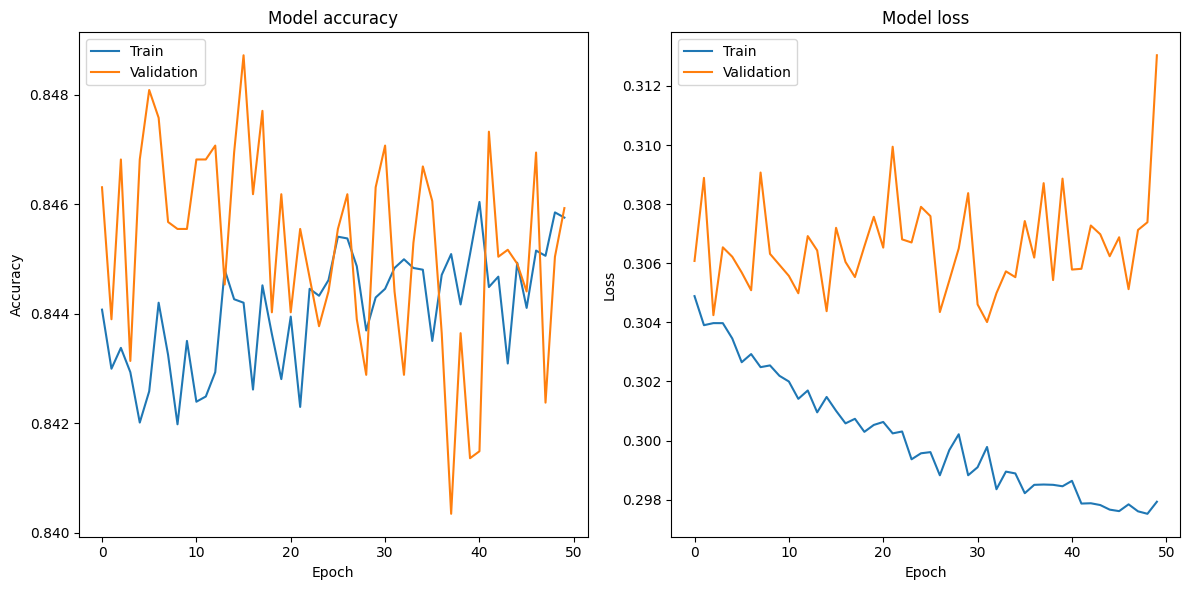

In [87]:
import matplotlib.pyplot as plt

# Plot training history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()
